#03

In [ ]:
from sklearn import datasets

d=datasets.load_iris() # iris 데이터셋을 읽고
print(d.DESCR) # 내용을 출력
for i in range(0,len(d.data)): # 샘플을 순서대로 출력
    print(i+1,d.data[i],d.target[i])
    
from sklearn import svm

s=svm.SVC(gamma=0.1,C=10) # svm 분류 모델 SVC 객체 생성하고
s.fit(d.data,d.target) # iris 데이터로 학습

res_SVM=s.predict(d.data)
print("SVM: 샘플의 부류는", res_SVM)

correct=[i for i in range(len(res_SVM)) if res_SVM[i]==d.target[i]]
accuracy=len(correct)/len(res_SVM)
print("SVM 정확률=",accuracy*100, "%")

################
# 본인 코드 작성
################
from sklearn import tree

t=tree.DecisionTreeClassifier() 
t=t.fit(d.data,d.target)

res_DTC=t.predict(d.data)
print("DTC: 샘플의 부류는", res_DTC)

correct=[i for i in range(len(res_DTC)) if res_DTC[i]==d.target[i]]
accuracy=len(correct)/len(res_DTC)
print("DTC 정확률=",accuracy*100, "%")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#04

In [ ]:
from sklearn import datasets
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6) # 40%를 테스트 집합으로 함

################
# 본인 코드 작성
################
select=[]
s=svm.SVC(gamma=0.001)
s_accuracies=cross_val_score(s,x_train,y_train,cv=5)
print("SVM 정확률 집합")
print(s_accuracies)
print("SVM 정확률(평균)=%0.3f"%(s_accuracies.mean()*100))
select.append(s_accuracies.mean()*100)

t=tree.DecisionTreeClassifier()
t_accuracies=cross_val_score(t,x_train,y_train,cv=5)
print("DTC 정확률 집합")
print(t_accuracies)
print("DTC정확률(평균)=%0.3f"%(t_accuracies.mean()*100),"%")
select.append(t_accuracies.mean()*100)

r=RandomForestClassifier(max_depth=2, random_state=0)
r_accuracies=cross_val_score(r,x_train,y_train,cv=5)
print("RFC 정확률 집합")
print(r_accuracies)
print("RFC 정확률(평균)=%0.3f"%(r_accuracies.mean()*100),"%")
select.append(r_accuracies.mean()*100)

idx=select.index(max(select))



if idx==0:
    print("선택된 모델 SVM")
    s.fit(x_test,y_test) 
    res=s.predict(x_test)
    
elif idx==1:
    print("선택된 모델 DTC")
    t.fit(x_test,y_test) 
    res=t.predict(x_test)

else:
    print("선택된 모델 RFC")
    r.fit(x_test,y_test) 
    res=r.predict(x_test)
    
    
correct=[i for i in range(len(res)) if res[i]==y_test[i]]
accuracy=len(correct)/len(res)
print("정확률=",accuracy*100, "%")


SVM 정확률 집합
[0.97222222 0.98611111 0.99074074 0.98139535 0.97209302]
SVM 정확률(평균)=98.051
DTC 정확률 집합
[0.80555556 0.81481481 0.84259259 0.8372093  0.81395349]
DTC정확률(평균)=82.283 %
RFC 정확률 집합
[0.77314815 0.83796296 0.83333333 0.86046512 0.79534884]
RFC 정확률(평균)=82.005 %
선택된 모델 SVM
정확률= 99.72183588317107 %


# 05




시작


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


훈련 집합 테스트집합 분리 완료
하이퍼 매개변수 최적화에 걸린 시간은 3439.585557937622 초입니다.


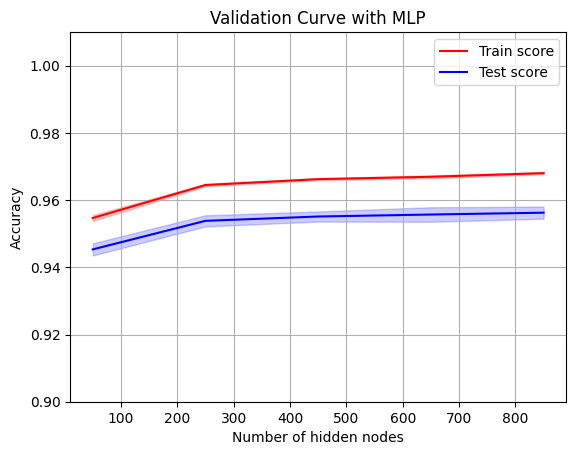


최적의 은닉층의 노드 개수는 850 개입니다.



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[[2725    0    7    4    3   11   11    7   11   12]
 [   0 3116   19    7   12    6   11   11   21   11]
 [   6    7 2719   28    7    5    5   29   16    3]
 [   5   10   11 2722    2   43    0    9   49   33]
 [   2    4   16    1 2632   10   13   12    5   50]
 [  10    2    1   32    0 2409   17    1   23   11]
 [  19    1   12    6   10   23 2680    1   16    2]
 [   3    6   21   13    5    3    0 2797   12   40]
 [  13    8   16   24    6   10    8    4 2532   17]
 [   4    4    3   11   43    9    0   30   15 2608]]
테스트 집합에 대한 정확률은 96.21428571428572 %입니다.


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

################
# 본인 코드 작성
################
print("시작")
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train,x_test,y_train,y_test=train_test_split(mnist.data,np.int16(mnist.target),train_size=0.6)
print("훈련 집합 테스트집합 분리 완료")

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start=time.time() # 시작 시각
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=20,solver='sgd')
prange=range(50,1001,200)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=5,scoring="accuracy",n_jobs=4)
end=time.time() # 끝난 시각
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다.")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

# 성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다.\n")

# 최적의 은닉 노드 개수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=20,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

# 혼동 행렬

conf=np.zeros((10,10),dtype=np.int16)
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")


# 07

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:])

################
# 본인 코드 작성
################


mlps=[]
mlps.append(MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=False))
mlps.append(MLPClassifier(hidden_layer_sizes=(100,100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=False))
mlps.append(MLPClassifier(hidden_layer_sizes=(100,100,100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=False))
mlps.append(MLPClassifier(hidden_layer_sizes=(100,100,100,100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=False))
mlps.append(MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=False))

def test(mlp,num):
    # MLP 분류기 모델을 학습
    mlp.fit(x_train,y_train)

    # 테스트 집합으로 예측
    res=mlp.predict(x_test)

    # 혼동 행렬
    conf=np.zeros((10,10),dtype=np.int16)
    for i in range(len(res)):
        conf[res[i]][y_test[i]]+=1
    print(conf)

    # 정확률 계산
    no_correct=0
    for i in range(10):
        no_correct+=conf[i][i]
    accuracy=no_correct/len(res)
    print("(은닉층 %d개)"%num,"테스트 집합에 대한 정확률은",accuracy*100, "%입니다.\n")

   
for i in range(1,6):
    test(mlps[i-1],i)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


[[ 970    0    3    0    0    2    6    1    3    2]
 [   0 1122    1    0    1    2    2    2    1    3]
 [   2    5 1009    5    3    0    3    9    3    0]
 [   0    0    3  985    0   11    1    5    5    4]
 [   1    0    0    0  961    2    2    0    4    9]
 [   2    1    0    4    1  862    6    1    2    2]
 [   1    3    1    1    4    4  937    0    0    0]
 [   1    1    5    3    0    0    0 1000    3    2]
 [   2    3    8    4    1    6    1    5  949    3]
 [   1    0    2    8   11    3    0    5    4  984]]
(은닉층 1개) 테스트 집합에 대한 정확률은 97.78999999999999 %입니다.

[[ 972    0    4    0    1    3    5    1    5    1]
 [   1 1123    1    0    0    0    2    5    0    3]
 [   0    4 1008    4    3    0    2   10    2    0]
 [   0    1    2  989    0    9    1    1    7    4]
 [   1    0    1    0  964    1    6    2    2    6]
 [   1    0    0    4    0  866    6    0    5    2]
 [   2    2    2    0    3    2  936    0    1    0]
 [   1    1    4    4    2    0    0 1001    4  

#08

glorot_uniform
정확률은 97.82000184059143 %


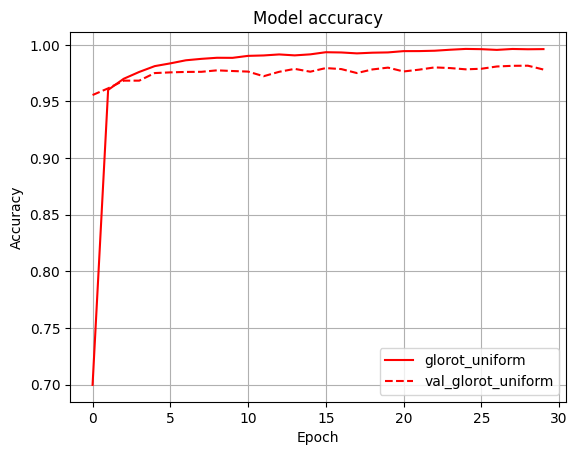

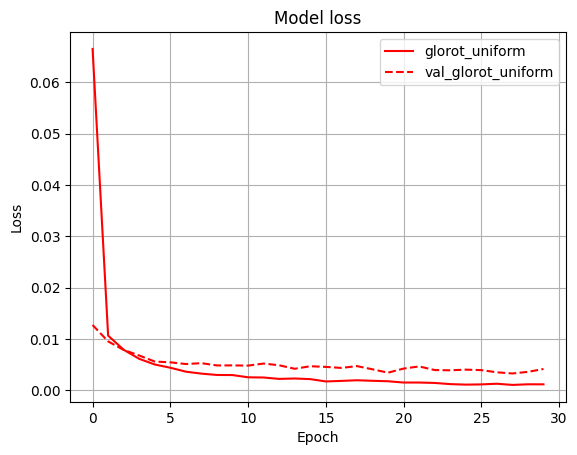

glorot_normal
정확률은 98.089998960495 %


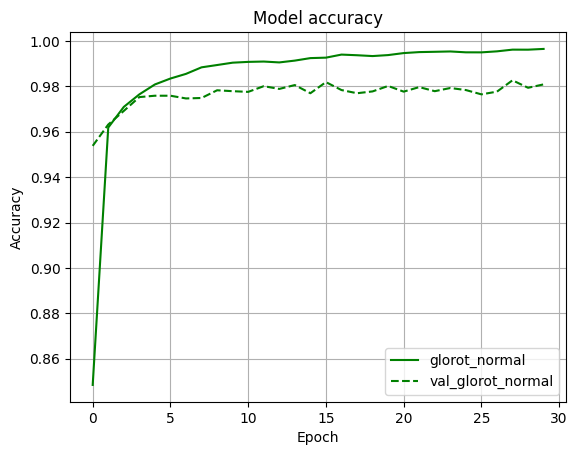

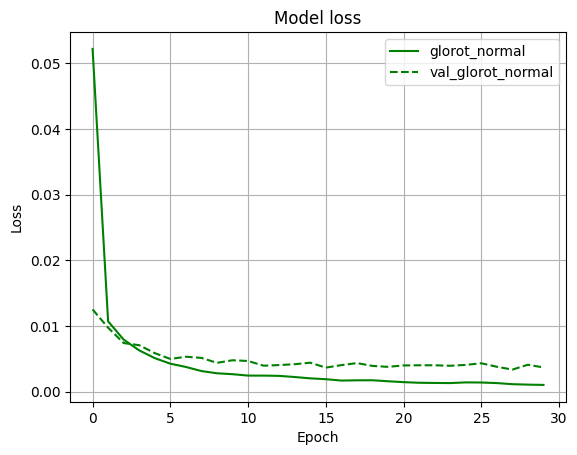

random_normal
정확률은 98.15999865531921 %


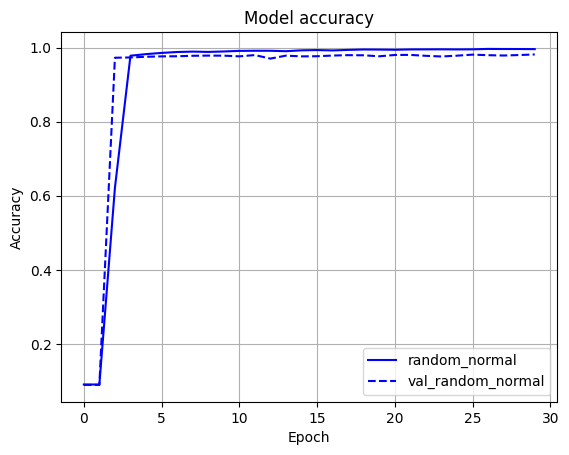

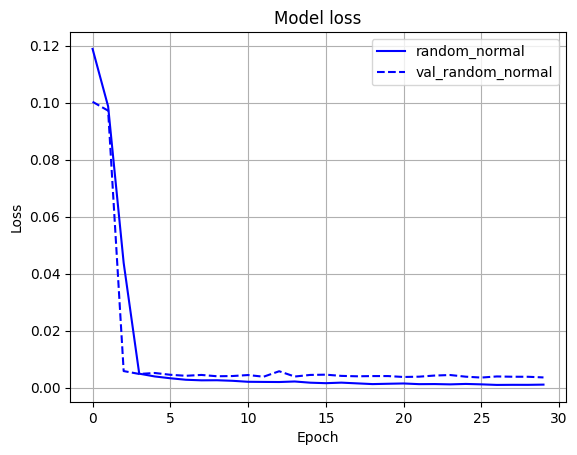

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10



def bulid(name,color):
        
        kinit=name
        # 신경망 구조 설계
        mlp=Sequential()
        mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer=kinit,bias_initializer='zeros'))
        mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer=kinit,bias_initializer='zeros'))
        mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer=kinit,bias_initializer='zeros'))
        mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer=kinit,bias_initializer='zeros'))
        mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer=kinit,bias_initializer='zeros'))

    

        # 신경망 학습
        mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
        hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=0)
     

        # 신경망의 정확률 측정
        res=mlp.evaluate(x_test,y_test,verbose=0)
        print(name)
        print("정확률은",res[1]*100,"%")
        
        # 정확률 곡선
        plt.plot(hist.history['accuracy'],color[0])
        plt.plot(hist.history['val_accuracy'],color[1])
   
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend([name,'val_' + name], loc='best')
        plt.grid()
        plt.show()

        # 손실 함수 곡선
        plt.plot(hist.history['loss'],color[0])
        plt.plot(hist.history['val_loss'],color[1])
       
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend([name,'val_' + name], loc='best')
        plt.grid()
        plt.show()

        


hists=[]
colors=[("r",'r--'),("g","g--"),("b","b--")]
hists.append(bulid('glorot_uniform',colors[0]))
hists.append(bulid('glorot_normal',colors[1]))
hists.append(bulid('random_normal',colors[2]))


    

# 10


In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=20
k=5 # 5-겹

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD(learning_rate=0.001))
acc_adam=cross_validation(Adam(learning_rate=0.001))
acc_adagrad=cross_validation(Adagrad(learning_rate=0.001))
acc_rmsprop=cross_validation(RMSprop(learning_rate=0.001))

# 옵티마이저 4개의 정확률을 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())



# 네 옵티마이저의 정확률을 박스플롯으로 비교
# plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
# plt.grid()

opts=[np.array(acc_sgd).mean(),np.array(acc_adam).mean(),np.array(acc_adagrad).mean(),np.array(acc_rmsprop).mean()]
idx=opts.index(max(opts))

#교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation2(opt,batch_siz):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

select=Adam(learning_rate=0.001)
name="Adam"
print()
if idx==0:
    print("선택된 옵티마이저 SGD")
    name="SGD"
    select=SGD(learning_rate=0.001)
    
elif idx==1:
    print("선택된 옵티마이저 Adam")
    name="Adam"
    select=Adam(learning_rate=0.001)

elif idx==2:
    print("선택된 옵티마이저 Adagrad")
    name="Adagrad"
    select=Adagrad(learning_rate=0.001)
else:
    print("선택된 옵티마이저 RMSprop")
    name="RMSprop"
    select=RMSprop(learning_rate=0.001)

print(select)
print(name)
acc_bat64=cross_validation2(select,64)
acc_bat128=cross_validation2(select,128)
acc_bat256=cross_validation2(select,256)
acc_bat512=cross_validation2(select,512)
acc_bat1024=cross_validation2(select,1024)

print("BatchSize_64:",np.array(acc_bat64).mean())
print("BatchSize_128:",np.array(acc_bat128).mean())
print("BatchSize_256:",np.array(acc_bat256).mean())
print("BatchSize_512:",np.array(acc_bat512).mean())
print("BatchSize_1024:",np.array(acc_bat1024).mean())

# plt.boxplot([acc_bat64,acc_bat128,acc_bat256,acc_bat512,acc_bat1024],labels=["BatchSize_64","BatchSize_128","BatchSize_256","BatchSize_512","BatchSize_1024"])
# plt.grid()
def cross_validation3(opt,batch_siz,n_epoch):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

batches=[np.array(acc_bat64).mean(),np.array(acc_bat128).mean(),np.array(acc_bat256).mean(),np.array(acc_bat512).mean(),np.array(acc_bat1024).mean()]
idx=batches.index(max(batches))

size=256
print()
if idx==0:
    print("선택된 배치 사이즈 64")
    size=64
elif idx==1:
    print("선택된 배치 사이즈 128")
    size=128
elif idx==2:
    print("선택된 배치 사이즈 256")
    size=256
elif idx==3:
    print("선택된 배치 사이즈 512")
    size=512
else:
     print("선택된 배치 사이즈 1024")
     size=1024
#print(size)

acc_ep20=cross_validation3(select,size,20)
acc_ep40=cross_validation3(select,size,40)
acc_ep60=cross_validation3(select,size,60)
acc_ep80=cross_validation3(select,size,80)
acc_ep100=cross_validation3(select,size,100)

print("epoch_20:",np.array(acc_ep20).mean())
print("epoch_40:",np.array(acc_ep40).mean())
print("epoch_60:",np.array(acc_ep60).mean())
print("epoch_80:",np.array(acc_ep80).mean())
print("epoch_100:",np.array(acc_ep100).mean())

epos=[np.array(acc_ep20).mean(),np.array(acc_ep40).mean(),np.array(acc_ep60).mean(),np.array(acc_ep80).mean(),np.array(acc_ep100).mean()]
idx=epos.index(max(epos))

epo=20
print()
if idx==0:
    print("선택된 epoch 20")
    epo=20
elif idx==1:
    print("선택된 epoch 40")
    epo=40
elif idx==2:
    print("선택된 epoch 60")
    epo=60
elif idx==3:
    print("선택된 epoch 80")
    epo=80
else:
    print("선택된 epoch 100")
    epo=100
#print(epo)
print("사용된 하이퍼 매개변수" )
print("학습률: %f 옵티마이저: %s, 배치사이즈: %d, epoch: %d"%(0.001,name,size,epo))
print("최적의 정확률: ",epos[idx]*100,"%")


11490434/11490434 [==============================] - 2s 0us/step
SGD: 0.863100004196167
Adam: 0.9792333364486694
Adagrad: 0.9135500073432923
RMSprop: 0.9784333348274231

선택된 옵티마이저 Adam
Adam
BatchSize_64: 0.9763166666030884
BatchSize_128: 0.9771000027656556
BatchSize_256: 0.9782166481018066
BatchSize_512: 0.9783833265304566
BatchSize_1024: 0.9776000022888184

선택된 배치 사이즈 512
epoch_20: 0.9784333348274231
epoch_40: 0.9809166789054871
epoch_60: 0.9804500102996826
epoch_80: 0.9811500072479248
epoch_100: 0.9806833386421203

선택된 epoch 80
사용된 하이퍼 매개변수
학습률: 0.001000 옵티마이저: Adam, 배치사이즈: 512, epoch: 80
최적의 정확률:  98.11500072479248 %
